## Start Node

In [1]:
import rclpy
from nimbro_utils.lazy import start_and_spin_node, stop_node

In [2]:
class MyNode(rclpy.node.Node):
    def __init__(self, context=None):
        super().__init__("test_sensor_interface_node", context=context)

In [3]:
node, executor, context, thread = start_and_spin_node(MyNode, blocking=False)

> Starting node 'MyNode'


## Add SensorInterface

In [4]:
from nimbro_utils.lazy import SensorInterface

In [5]:
node.sensor_interface = SensorInterface(node)

2025-09-10 18:44:29.684 [INFO] [test_sensor_interface_node.sensors]: Subscribing and caching topics: [] (0)


#### The SensorInterface's settings can be obtained via `get_settings()` and updated via `set_settings()`.

In [6]:
node.sensor_interface.get_settings()

{'severity': 20,
 'suffix': 'sensors',
 'names': [],
 'topics': [],
 'types': [],
 'formats': [],
 'cache': 10}

In [7]:
# We use an Orbbec Gemini 335.

# List of supported formats per topic type determining what get_data() returns:
#   - Image and CompressedImage: ["passthrough", f"{format}_{encoding}"]
#                                with format in ["numpy", "image", "compressed"]
#                                and encoding in ["16UC1", "mono8", "mono16", "bgr8", "rgb8", "bgr16", "rgb16"]
#   - PointCloud2: ["passthrough", "numpy"]
#   - LaserScan: ["passthrough", "numpy", "pointcloud"]

settings = {
    'names': ["color", "depth"],
    'topics': ["/gemini/color/image_raw/compressed", "/gemini/depth/image_raw/compressedDepth"],
    'types': ["CompressedImage", "CompressedImage"],
    'formats': ["numpy_bgr8", "numpy_16UC1"],
}

node.sensor_interface.set_settings(settings=settings)

2025-09-10 18:44:29.721 [INFO] [test_sensor_interface_node.sensors]: Subscribing and caching topics: [('/gemini/color/image_raw/compressed', 'CompressedImage', 10), ('/gemini/depth/image_raw/compressedDepth', 'CompressedImage', 10)] (2)


#### The sensor status can be monitored vai `get_status()`.

In [8]:
status = node.sensor_interface.get_status(log=True)

2025-09-10 18:44:29.734 [INFO] [test_sensor_interface_node.sensors]: Sensor status: (2)
'/gemini/color/image_raw/compressed' (CompressedImage)
	Names & Formats: [('color', 'numpy_bgr8')]
	Cached: 0/10 (EMPTY)
'/gemini/depth/image_raw/compressedDepth' (CompressedImage)
	Names & Formats: [('depth', 'numpy_16UC1')]
	Cached: 0/10 (EMPTY)


In [9]:
print(status)

[{'topic': '/gemini/color/image_raw/compressed', 'type': 'CompressedImage', 'names_and_formats': [('color', 'numpy_bgr8')], 'cache_size': 10, 'cache_used': 0}, {'topic': '/gemini/depth/image_raw/compressedDepth', 'type': 'CompressedImage', 'names_and_formats': [('depth', 'numpy_16UC1')], 'cache_size': 10, 'cache_used': 0}]


## Retrieve sensor data

In [10]:
from nimbro_utils.lazy import show_image, visualize_depth

In [11]:
success, message, data = node.sensor_interface.get_data(source="color")

In [12]:
print(success)
print(message)
print(type(data))

True
Retrieved sensor data from source 'color' with age '-0.070s' after waiting '0.254s'.
<class 'numpy.ndarray'>


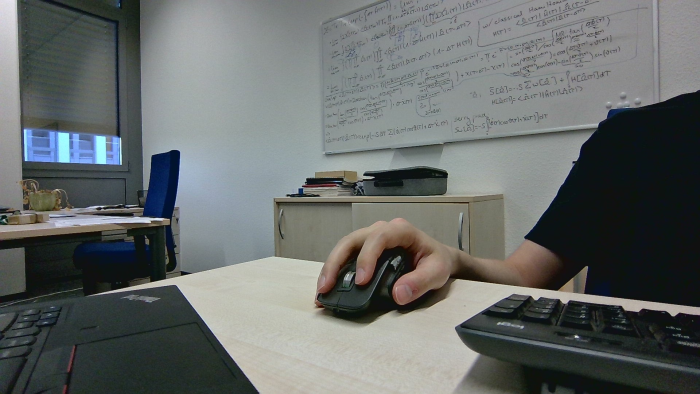

In [13]:
show_image(data, width=700)

In [14]:
success, message, data = node.sensor_interface.get_data(source=["color", "depth"], max_time_delta=0.2, max_age=0.0, timeout=1.0) # Arguments 'max_time_delta', 'max_age', and 'timeout' are defaults.

In [15]:
print(success)
print(message)
print(type(data))

True
Retrieved sensor data from sources ['color', 'depth'] with max. age '-0.204s' after waiting '0.604s' (max. delta: '0.165s').
<class 'list'>


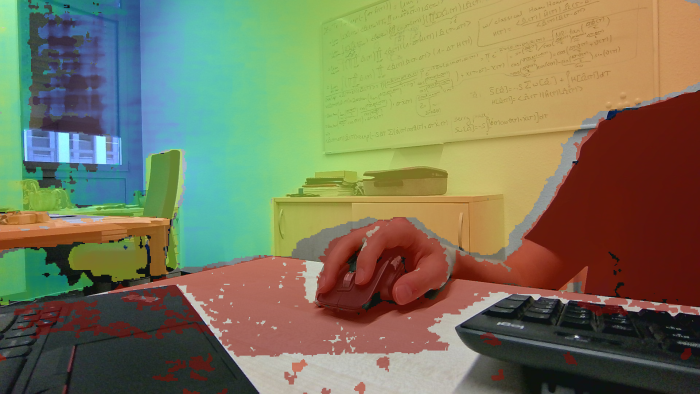

In [16]:
visual = visualize_depth(depth=data[1], image=data[0])
show_image(visual, width=700)

## Stop Node

In [17]:
stop_node(node, executor, context, thread)

> Stopped node 'MyNode'
